# classification with SVM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

df = pd.read_excel (r'data.xlsx') 
print (df.columns)
df

Index(['ID', 'Gender', 'Nationality', 'Major', 'Level', 'IE1', 'SMSK3', 'RAS1',
       'RAS2', 'SMSK1', 'SMSK4', 'IE2', 'TL1', 'RAS3', 'IE3', 'RAS4', 'RAS5',
       'IE4', 'SMSK2', 'TL2', 'TL3', 'PSD1', 'PSD2', 'PSD3', 'IE5', 'PSD4',
       'PSD5', 'IM1', 'IM2', 'IM3', 'IM4', 'IM5', 'IM6', 'W1', 'W2', 'W3',
       'Employed', 'Score', 'Class'],
      dtype='object')


,ID,Gender,Nationality,Major,Level,IE1,SMSK3,RAS1,RAS2,SMSK1,...,IM3,IM4,IM5,IM6,W1,W2,W3,Employed,Score,Class
0,1,0,1,0,2,4,3,4,4,2,...,4,4,4,4,4.0,4.0,4.0,1.0,3.20,1
1,2,0,0,0,2,4,4,4,4,3,...,4,3,4,4,3.0,4.0,3.0,0.0,3.82,1
2,3,0,1,0,1,3,2,3,4,3,...,3,4,4,3,4.0,4.0,2.0,1.0,3.75,1
3,4,1,1,1,3,4,4,4,4,4,...,4,4,4,4,3.0,4.0,4.0,1.0,3.70,1
4,5,0,0,0,2,4,3,3,4,3,...,4,3,3,3,4.0,4.0,2.0,1.0,3.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,256,1,0,1,2,4,4,4,4,4,...,4,4,4,4,4.0,4.0,4.0,1.0,3.34,1
256,257,0,0,0,1,4,4,4,3,4,...,4,4,4,4,4.0,4.0,NaN,0.0,3.18,1
257,258,0,0,0,1,3,3,3,3,3,...,3,3,3,3,NaN,3.0,NaN,0.0,3.97,0
258,259,1,0,0,2,4,4,4,4,4,...,4,3,4,4,4.0,4.0,1.0,1.0,3.51,1


In [2]:
print("dimension of data: {}".format(df.shape))
print(df.groupby('Class').size())


dimension of data: (260, 39)
Class
0    133
1    127
dtype: int64


C:\Users\Poeticlilboi\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Class', ylabel='count'>

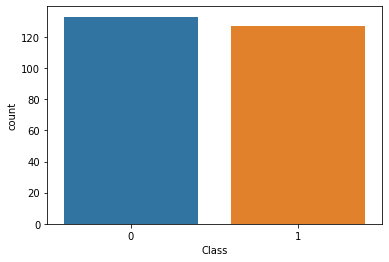

In [3]:
import seaborn as sns
sns.countplot(df['Class'],label="Count")

In [4]:
def preProcessing(df):
    df = df.dropna(axis = 1)
    df.head()
    return df
df = preProcessing(df)
df

,ID,Gender,Nationality,Major,Level,IE1,SMSK3,RAS1,RAS2,SMSK1,...,PSD4,PSD5,IM1,IM2,IM3,IM4,IM5,IM6,Score,Class
0,1,0,1,0,2,4,3,4,4,2,...,3,3,4,4,4,4,4,4,3.20,1
1,2,0,0,0,2,4,4,4,4,3,...,4,3,3,4,4,3,4,4,3.82,1
2,3,0,1,0,1,3,2,3,4,3,...,3,3,4,4,3,4,4,3,3.75,1
3,4,1,1,1,3,4,4,4,4,4,...,4,4,4,4,4,4,4,4,3.70,1
4,5,0,0,0,2,4,3,3,4,3,...,3,4,3,3,4,3,3,3,3.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,256,1,0,1,2,4,4,4,4,4,...,3,4,4,4,4,4,4,4,3.34,1
256,257,0,0,0,1,4,4,4,3,4,...,4,4,3,4,4,4,4,4,3.18,1
257,258,0,0,0,1,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3.97,0
258,259,1,0,0,2,4,4,4,4,4,...,4,4,4,4,4,3,4,4,3.51,1


In [5]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'Class']
y = df['Class']


X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.33,
    stratify=df['Class'], # data is split in a stratified fashion, using this as the class labels.
    random_state=66)#Controls the shuffling applied to the data before applying the split

In [6]:
from sklearn import svm
#kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
clf = svm.SVC(kernel="linear")
clf.fit(X, y)

print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))

Accuracy on training set: 0.971
Accuracy on test set: 0.988


In [7]:
svc = svm.SVC(C=10)
#C, default=1.0
#Regularization parameter. The strength of the regularization is inversely proportional to C. 
#Must be strictly positive. The penalty is a squared l2 penalty.
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

y_true, y_pred = y_test, clf.predict(X_test)
print("F1 score: {:.3f}".format(f1_score(y_true, y_pred)))

Accuracy on training set: 0.690
Accuracy on test set: 0.616
F1 score: 0.988


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

tuned_parameters = [{'kernel': ['rbf'],'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['poly'], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['sigmoid'], 'C': [1, 10, 100, 1000]}
                   ]

        
scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        svm.SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1000, 'kernel': 'rbf'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.95      0.84      0.89        44
           1       0.85      0.95      0.90        42

    accuracy                           0.90        86
   macro avg       0.90      0.90      0.90        86
weighted avg       0.90      0.90      0.90        86


# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'C': 1000, 'kernel': 'rbf'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.95      0.84      0.89        44
           1       0.85      0.95      0.90        42

   